## Twitter Analitiği
- Günümüzde sosyal medya hayatın her alanına girmiş, pazarlama, siyaset, sağlık gibi pek çok konuda kitleleri etkileyerek önemli bir rol oynamaya başlamıştır. Sosyal medya, insanlar için bir paylaşım, eğlence ve haberleşme aracı iken araştırmacılar için, özellikle de veri bilimciler için büyük bir veri madeni kaynağı haline gelmiştir. Dolayısıyla, bu verilerin işletilmesi, yönetimi, bu veriler üzerinde analizler yapılması, anlamlı sonuçlar ve modeler çıkarılması yani “Sosyal Medya Analitiği” de önemli bir araştırma konusu haline gelmiştir. En çok kullanılan sosyal medya kanallarında birisi de 2020 itibariyle kullanıcı sayısı 340 milyon olan Twitter’dır. Bu çalışmada, Twitter Api üzerinden elde edilen veriler ile çeşitli analizler ve görselleştirmeler yapılmıştır.

### Gerekli Kütüphanlerin Yüklenmesi

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
pip install tweepy

You should consider upgrading via the 'C:\Users\Pelin\anaconda3\python.exe -m pip install --upgrade pip' command.


### API Bağlantısının Yapılması


In [3]:
import tweepy,codecs

consumer_key = 'kUc1RbgjP2EJMo6wHhG7uNM0N'
consumer_secret = 'V1qxzAqiyAQCz7DHMj4Zn6ff4DWqFxSxV31DDwC43ZaHlqDQ3Z'
access_token = '802519976909357056-Kjr2DP0vDIzncl4dYZfAZOn3QBW3vRy'
access_token_secret = '8ghm5GSwZM1gVDSCSfydOr2dtg4jofGxt20ghzNsUbzX3'


auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

### Profil analizi
- Bu bölümde kulanıcıya ait birçok bilgiye ulaşılabilir.

In [4]:
user = api.get_user("AndrewYNg")

In [5]:
dir(user) # erişilebilecek özellikler 

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_api',
 '_json',
 'contributors_enabled',
 'created_at',
 'default_profile',
 'default_profile_image',
 'description',
 'entities',
 'favourites_count',
 'follow',
 'follow_request_sent',
 'followers',
 'followers_count',
 'followers_ids',
 'following',
 'friends',
 'friends_count',
 'geo_enabled',
 'has_extended_profile',
 'id',
 'id_str',
 'is_translation_enabled',
 'is_translator',
 'lang',
 'listed_count',
 'lists',
 'lists_memberships',
 'lists_subscriptions',
 'location',
 'name',
 'notifications',
 'parse',
 'parse_list',
 'profile_background_color',
 'profile_background_image_url',
 'profile_back

In [6]:
user.name

'Andrew Ng'

In [7]:
user.profile_image_url

'http://pbs.twimg.com/profile_images/733174243714682880/oyG30NEH_normal.jpg'

In [8]:
user.screen_name

'AndrewYNg'

In [9]:
user.verified

True

In [10]:
user.friends_count

470

In [11]:
user.location

'Palo Alto, CA'

In [12]:
user.statuses_count

1293

In [13]:
user.followers_count

524104

In [14]:
user.favourites_count

995

### Profilin Enleri
- Bu bölümde kullanıcının etkileşim gücünü göstermeye yönelik çalışmalar yapılabilir.
- Profil ne kadar aktif, profilin sosyalliği ve aktifliği insanları etkileyebiliyor mu? gibi sorular araştırılabilir.
- Kullanıcın kitleleri etkileme gücü ve bu gücün çeşitli frekanslar üzerindeki dağılımları incelenebilinir.
- Örneğin, ortalama ve standart sapma üstünde kalan tweetlere bakılıp kullanıcının en beğenilen twetlerine ulaşılabilir. Bu hem beğenilenere hem retweetlwere uygulanarak çeşitli şekillerde kullanılacak bir pattern oluşturabilir. 

In [55]:
#user timelinedaki tweetlerin çekilmesi
tweets = api.user_timeline(id = 'AndrewYNg') 
for i in tweets:
    print(i.text)

Thanks to everyone that replied to my question on what the AI community should work on. I think if we come together… https://t.co/pWcTskJJNq
More companies should tell employees it's fine if your kids  show up on Zoom when you're working from home. This is… https://t.co/wamOjKGwNi
What do you think is the single most important problem that the AI community should be working on?
@realSharonZhou Sounds like a good application for the kernel method.
Ken Church, Marti Hearst, @lukaszkaiser, @YMourri &amp; I will speak at Break into NLP, a virtual live event on July 29… https://t.co/hcpvWFGIIH
RT @coursera: Coursera’s #GlobalSkillsIndex 2020 is here! See how your country and industry rank in essential skills across business, techn…
Wonderful! Kudos to Harvard and MIT for fighting this in court, as well as to everyone that spoke up against the ne… https://t.co/nO0hMFRvsc
I'm grateful for Dr. Fauci's tireless work to disseminate good science about the pandemic. 

When we see a scientis… https

In [56]:
# TimeLine 'dan çekilen tweetlerle DataFrame oluşturma.

def  timeline_df(tweets):
    
    import pandas as pd
    df = pd.DataFrame()
    df['id'] = list(map(lambda tweet: tweet.id, tweets))
    df['created_at'] = list(map(lambda tweet: tweet.created_at, tweets))
    df['text'] = list(map(lambda tweet: tweet.text, tweets))
    df['favorite_count'] = list(map(lambda tweet: tweet.favorite_count, tweets))
    df['retweet_count'] = list(map(lambda tweet: tweet.retweet_count, tweets))
    df['source'] = list(map(lambda tweet: tweet.source, tweets))
    
    return df


In [59]:
df= timeline_df(tweets)

In [60]:
?tweets

In [61]:
df.head()

,id,created_at,text,favorite_count,retweet_count,source
0,1293672548589162496,2020-08-12 22:15:45,Thanks to everyone that replied to my question...,1986,387,Twitter Web App
1,1290734842418622464,2020-08-04 19:42:21,More companies should tell employees it's fine...,14236,2254,Twitter Web App
2,1290029141522173952,2020-08-02 20:58:09,What do you think is the single most important...,3813,581,Twitter Web App
3,1287083926947639296,2020-07-25 17:54:55,@realSharonZhou Sounds like a good application...,236,8,Twitter Web App
4,1285649008199958528,2020-07-21 18:53:04,"Ken Church, Marti Hearst, @lukaszkaiser, @YMou...",306,60,Twitter Web App


In [62]:
# en çok favlanan 5 tweeti listeleme
df.sort_values("favorite_count", ascending = False)[["text","favorite_count"]].iloc[0:5] 

,text,favorite_count
13,The suspension of the H1B visa program is bad ...,20138
1,More companies should tell employees it's fine...,14236
7,I'm grateful for Dr. Fauci's tireless work to ...,5076
10,New @ICEgov policy regarding F-1 visa internat...,3961
2,What do you think is the single most important...,3813


In [63]:
# en çok retweet yapılan 5 tweeti listeleme
df.sort_values("retweet_count", ascending = False)[["text","retweet_count"]].iloc[0:5] 

,text,retweet_count
13,The suspension of the H1B visa program is bad ...,3544
1,More companies should tell employees it's fine...,2254
7,I'm grateful for Dr. Fauci's tireless work to ...,1071
10,New @ICEgov policy regarding F-1 visa internat...,992
8,I wrote in today's edition of The Batch about ...,657


### Retweet & Favori Sayılarının Dağılımlarının Çıkarılması

- Örneğin; yukarıda incelediğimiz yaklaşık 500.000 takipçisi bulunan kullanıcının sadece takipçi sayısına bakarsak oldukça sosyal biri olduğu söylenebiliriz. Ancak bu kendi başına bir gösterge değildir. Takipççiler kullanıcıyı aktif olarak ne kadar takip ediyor araştrılmalıdır. Bunu anlamanın yöntemlerinden biri de beğeni ve retweet sayıslarının çıkarılmasıdır. Çünkü, beğeni ve retweetler daha fazla kişiyle etkileşim sağladığından kullanıcı sosyalliğinin önemli göstergelerindendir.

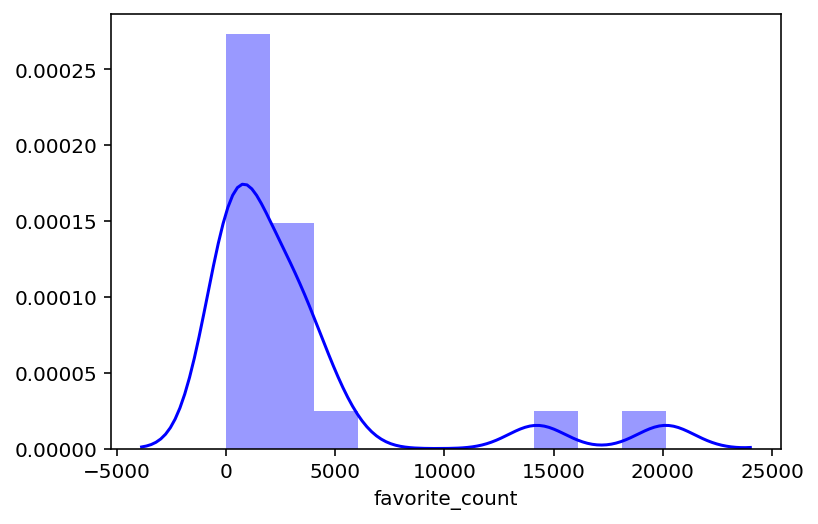

In [29]:
sns.distplot(df.favorite_count, color = "blue"); 

In [32]:
df.favorite_count.mean()

3190.05

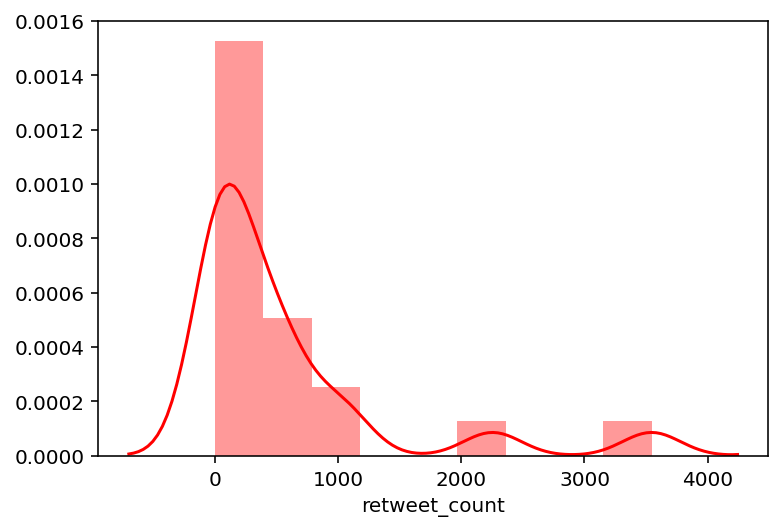

In [31]:
sns.distplot(df.retweet_count, color = "red"); 

In [33]:
df.retweet_count.mean()

564.85

- Beğeni değerlerine baktığımızda kullanıcının yaklaşık ort 3000 kişiyle aktif olarak etkileşimde olduğunu , retwetlere de baktığımızda da ort 500 kişinin bunu diğer insanlarla paylaşıp etkileştirdiğini söyleyebiliriz.

## Gün & Saat Dağılımı

In [34]:
df["tweet_saati"] = df["created_at"].apply(lambda x: x.strftime("%H")) 
df.head()

,id,created_at,text,favorite_count,retweet_count,source,tweet_saati
0,1293672548589162496,2020-08-12 22:15:45,Thanks to everyone that replied to my question...,1986,387,Twitter Web App,22
1,1290734842418622464,2020-08-04 19:42:21,More companies should tell employees it's fine...,14235,2254,Twitter Web App,19
2,1290029141522173952,2020-08-02 20:58:09,What do you think is the single most important...,3813,581,Twitter Web App,20
3,1287083926947639296,2020-07-25 17:54:55,@realSharonZhou Sounds like a good application...,236,8,Twitter Web App,17
4,1285649008199958528,2020-07-21 18:53:04,"Ken Church, Marti Hearst, @lukaszkaiser, @YMou...",306,60,Twitter Web App,18


In [35]:
df["tweet_saati"] = pd.to_numeric(df["tweet_saati"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              20 non-null     int64         
 1   created_at      20 non-null     datetime64[ns]
 2   text            20 non-null     object        
 3   favorite_count  20 non-null     int64         
 4   retweet_count   20 non-null     int64         
 5   source          20 non-null     object        
 6   tweet_saati     20 non-null     int64         
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 1.2+ KB


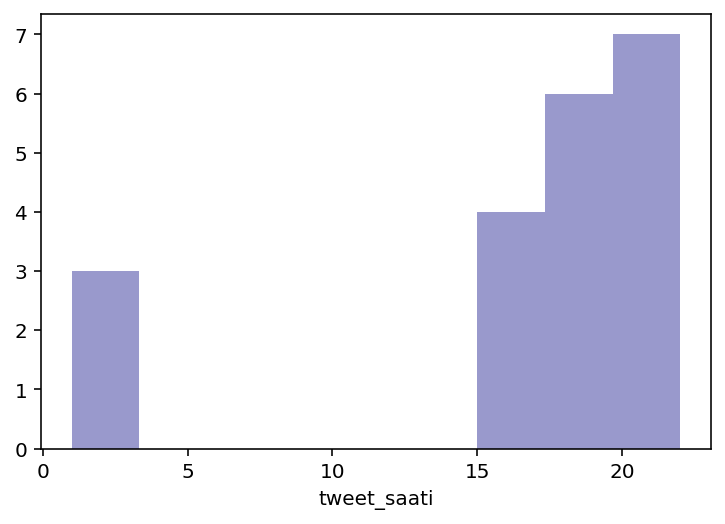

In [36]:
sns.distplot(df.tweet_saati, kde=False, color="navy") 

- Grafiğe bakıldığında ağırlıklı olarak  yaklaşık 15.00 ve 23.00 saatleri arasında tweet atılmış olduğu görülüyor. Bu saat aralığından kullanıcının hafta içi iş saatlerinden sonra tweet atıyor olabileceğini tahmin edilebiliriz. Bunu araştırmak için aktif olunan günlere de bakılmalıdır.

In [37]:
df["gunler"] = df["created_at"].dt.day_name()
df.head()

,id,created_at,text,favorite_count,retweet_count,source,tweet_saati,gunler
0,1293672548589162496,2020-08-12 22:15:45,Thanks to everyone that replied to my question...,1986,387,Twitter Web App,22,Wednesday
1,1290734842418622464,2020-08-04 19:42:21,More companies should tell employees it's fine...,14235,2254,Twitter Web App,19,Tuesday
2,1290029141522173952,2020-08-02 20:58:09,What do you think is the single most important...,3813,581,Twitter Web App,20,Sunday
3,1287083926947639296,2020-07-25 17:54:55,@realSharonZhou Sounds like a good application...,236,8,Twitter Web App,17,Saturday
4,1285649008199958528,2020-07-21 18:53:04,"Ken Church, Marti Hearst, @lukaszkaiser, @YMou...",306,60,Twitter Web App,18,Tuesday


In [38]:
gun_freq = df.groupby("gunler").count()["id"]
gun_freq

gunler
Friday       2
Monday       4
Saturday     1
Sunday       2
Thursday     3
Tuesday      5
Wednesday    3
Name: id, dtype: int64

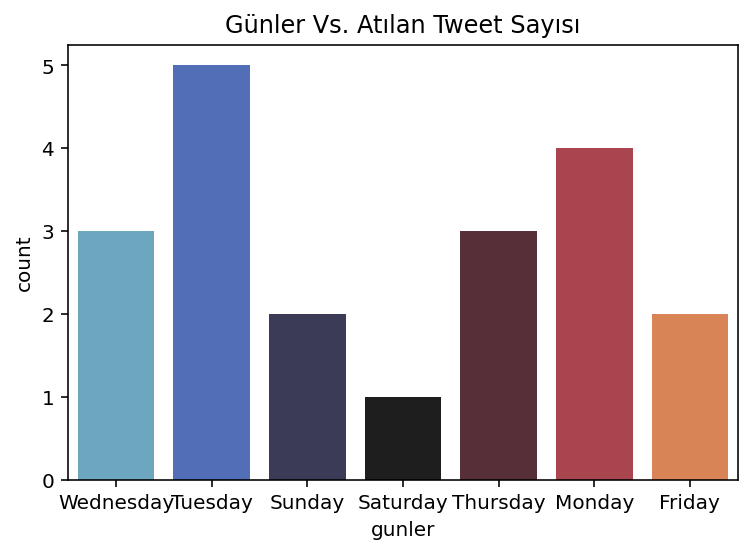

In [39]:
new_data= df.gunler
g = sns.countplot(new_data, palette="icefire")
plt.title("Günler Vs. Atılan Tweet Sayısı")
plt.show()

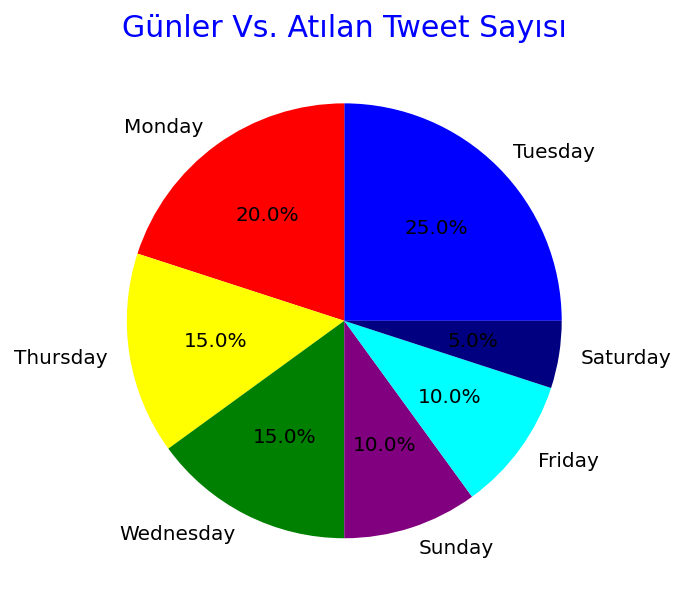

In [40]:
labels = df.gunler.value_counts().index
colors = ['blue','red','yellow','green','purple','cyan','navy']
explode = [0,0,0,0,0,0,0]
sizes =df.gunler.value_counts().values
plt.figure(figsize = (5,5))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%') 
plt.title('Günler Vs. Atılan Tweet Sayısı',color = 'blue',fontsize = 15) 
plt.show()

- Günlere göre tweet atma sayılarına da baktığımızda da kullanıcının hafta içi daha fazla aktif olduğunu görebiliyoruz. Hafta içi iş saatlerinden sonra daha fazla tweet atmış olduğu tahminimizi bu şekilde biraz daha destekleyebiliriz.

### Tweet Atma Kaynaklarının Betimlenmesi

In [41]:
kaynak_freq = df.groupby("source").count()["id"] 

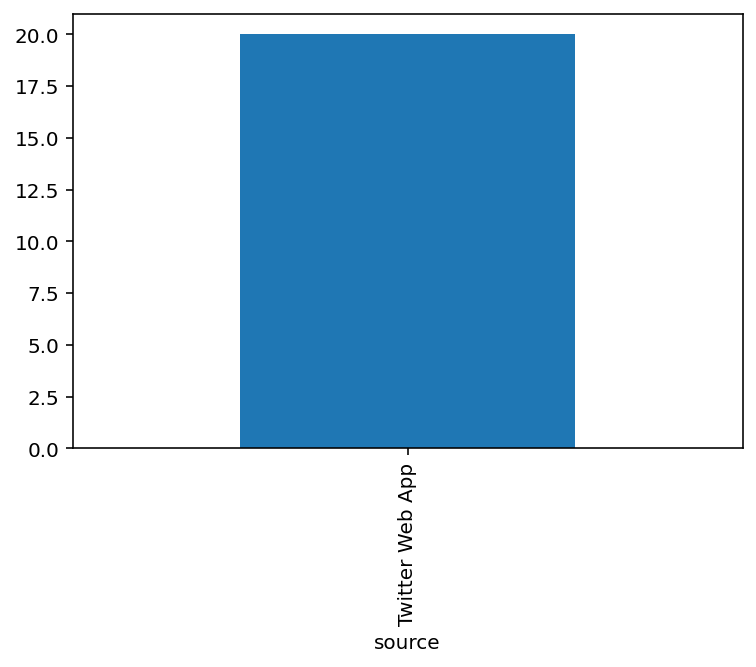

In [42]:
kaynak_freq.plot.bar(x = "source", y = "id")

In [43]:
# Gün , saat ve ve kaynak özelliklerinin beraber değerlendirilmesi.

In [44]:
df.groupby(["source","tweet_saati"])[["tweet_saati"]].count()

tweet_saati
source          tweet_saati             
Twitter Web App 1                      2
                2                      1
                15                     1
                17                     3
                18                     3
                19                     3
                20                     2
                21                     1
                22                     4

In [45]:
df.groupby(["source","tweet_saati","gunler"])[["tweet_saati"]].count()

tweet_saati
source          tweet_saati gunler                
Twitter Web App 1           Friday               1
                            Tuesday              1
                2           Tuesday              1
                15          Wednesday            1
                17          Monday               1
                            Saturday             1
                            Thursday             1
                18          Friday               1
                            Thursday             1
                            Tuesday              1
                19          Thursday             1
                            Tuesday              2
                20          Sunday               1
                            Wednesday            1
                21          Sunday               1
                22          Monday               3
                            Wednesday            1

### Takipçi ve Arkadaşların Analizi
- Takipçi ve arkadaşların analizi de profil sosyalliğinin önemli göstergelerindendir. Arkadaşların analizi kullanıcı hakkında daha fazla bilgiye sahibi olmamızı sağlar.

In [222]:
user = api.get_user(id = "AndrewYNg")

In [223]:
for friend in user.friends():
    print(friend.screen_name)

LisaSu
KamalaHarris
navrina_singh
rasbt
ProjectLincoln
BarmakN
EvanKirstel
david_sontag
achalprabhakar
issanjeev
ShamKakade6
plibin
tengyuma
EmmaBrunskill
DorsaSadigh
paperswithcode
profgalloway
3blue1brown
gaganbiyani
iclr_conf


In [224]:
friends= user.friends()
followers= user.followers()

In [225]:
def followers_df(takipci):
    import pandas as pd
    idler = [kisi.id for kisi  in takipci]
    df = pd.DataFrame(idler, columns = ["id"])
    
    df["created_at"] = [kisi.created_at for kisi in takipci]
    df["screen_name"] = [kisi.screen_name for kisi in takipci]
    df["location"] = [kisi.location for kisi in takipci]
    df["followers_count"] = [kisi.followers_count for kisi in takipci]
    df["statuses_count"] = [kisi.statuses_count for kisi in takipci]
    df["friends_count"] = [kisi.friends_count for kisi in takipci]
    df["favourites_count"] = [kisi.favourites_count for kisi in takipci]
    
    return df

In [226]:
df = followers_df(followers)
df.head()

,id,created_at,screen_name,location,followers_count,statuses_count,friends_count,favourites_count
0,752749158,2012-08-12 08:40:37,Roger_Arendse,,101,144,198,1854
1,1291250150430527488,2020-08-06 05:50:07,akulvohra,,0,0,24,0
2,31431641,2009-04-15 15:21:10,alireza246,"Irvine, CA",31,172,465,643
3,1291232215095889920,2020-08-06 04:39:28,Yvonne_Wong88,,0,16,82,16
4,1297387626647957504,2020-08-23 04:18:23,KMLSAI,,2,9,76,19


### Takipçi Segmentasyonu

- Segmentasyon, markaların ilgili olduğu pazarı bölümlere ayırarak, seçilen küçük pazara yönelik strateji oluşturmayı hedefleyen yönteme denir.
- Örneğin, odaklı bir erişim strateji izleme niyetindeyiz ve hedef kullanıcı ile ilgili bir takım çalışmalar yapacağız. Bunun üzerinden, üretkenlik, takipçiye sahip olma ve sosyal etkileşimli olma durumuna göre takipçileri segmente etmek isteyebiliriz.

In [227]:
df.index= df["screen_name"]
df.head()

,id,created_at,screen_name,location,followers_count,statuses_count,friends_count,favourites_count
screen_name,,,,,,,,
Roger_Arendse,752749158,2012-08-12 08:40:37,Roger_Arendse,,101,144,198,1854
akulvohra,1291250150430527488,2020-08-06 05:50:07,akulvohra,,0,0,24,0
alireza246,31431641,2009-04-15 15:21:10,alireza246,"Irvine, CA",31,172,465,643
Yvonne_Wong88,1291232215095889920,2020-08-06 04:39:28,Yvonne_Wong88,,0,16,82,16
KMLSAI,1297387626647957504,2020-08-23 04:18:23,KMLSAI,,2,9,76,19


In [228]:
s_data = df[["followers_count", "statuses_count"]]
s_data.head()

,followers_count,statuses_count
screen_name,,
Roger_Arendse,101,144
akulvohra,0,0
alireza246,31,172
Yvonne_Wong88,0,16
KMLSAI,2,9


In [229]:
s_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20 entries, Roger_Arendse to amanpache14
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   followers_count  20 non-null     int64
 1   statuses_count   20 non-null     int64
dtypes: int64(2)
memory usage: 480.0+ bytes


In [230]:
s_data["followers_count"] = s_data["followers_count"] + 0.01
s_data["statuses_count"] = s_data["statuses_count"] + 0.01
s_data = s_data.apply(lambda x: (x-min(x))/(max(x)-min(x))) #normalizasyon
s_data.head()

,followers_count,statuses_count
screen_name,,
Roger_Arendse,1.000000,0.172249
akulvohra,0.000000,0.000000
alireza246,0.306931,0.205742
Yvonne_Wong88,0.000000,0.019139
KMLSAI,0.019802,0.010766


- takipçi ve tweet sayısının göreceli etkilerini bir arada değerlendirek basit bir segmentasyon yaratmak istersek, kullanıcıların takipçilerini de amacımıza uygun olarak ikiye ayırabiliriz.

In [231]:
skor = s_data["followers_count"] * s_data["statuses_count"]  
skor

screen_name
Roger_Arendse      0.172249
akulvohra          0.000000
alireza246         0.063148
Yvonne_Wong88      0.000000
KMLSAI             0.000213
yzonggen           0.000000
rBaldisser         0.004773
DariyanKhan        0.000000
Jinkela84018518    0.000000
BBShannon285       0.000000
sisoyguerrero      0.203941
dponly1            0.000000
paramjeet1024      0.001066
pisanoontweet      0.851485
alefostores        0.000237
gaia_molinaro      0.001208
FabriniFabrini     0.017552
LAigner4           0.000000
bikekowal          0.005436
amanpache14        0.030402
dtype: float64

In [236]:
s_data["skor"] = skor
s_data["segment"] = np.where(s_data["skor"] >= skor.median() + skor.std()/len(skor), "A","B")
s_data.head(10)

,followers_count,statuses_count,skor,segment
screen_name,,,,
Roger_Arendse,1.000000,0.172249,0.172249,A
akulvohra,0.000000,0.000000,0.000000,B
alireza246,0.306931,0.205742,0.063148,A
Yvonne_Wong88,0.000000,0.019139,0.000000,B
KMLSAI,0.019802,0.010766,0.000213,B
yzonggen,0.000000,0.000000,0.000000,B
rBaldisser,0.128713,0.037081,0.004773,B
DariyanKhan,0.000000,0.002392,0.000000,B
Jinkela84018518,0.000000,0.000000,0.000000,B


In [254]:
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go

df5 = s_data.followers_count[s_data['segment']=='A']
df6= s_data.followers_count[s_data['segment']=='B']

trace1 = go.Histogram(
    x=df5,
    opacity=0.75,
    name = "A",
    marker=dict(color='rgba(171, 50, 96, 0.6)'))

trace2 = go.Histogram(
    x=df6,
    opacity=0.75,
    name = "B",
    marker=dict(color='rgba(12, 50, 196, 0.6)'))

data = [trace1, trace2]
layout = go.Layout(barmode='overlay',
                   title='',
                   xaxis=dict(title='followers_count'),
                   yaxis=dict( title=''),
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)

### Hashtag'den Veri Çekmek

In [64]:
 api.trends_available(); # trend olan hashtagler.

In [65]:
def ulke_kodlari():
    places = api.trends_available()
    all_woeids = {place['name'].lower(): place['woeid'] for place in places}
    return all_woeids

In [66]:
ulke_kodlari()

{'worldwide': 1,
 'winnipeg': 2972,
 'ottawa': 3369,
 'quebec': 3444,
 'montreal': 3534,
 'toronto': 4118,
 'edmonton': 8676,
 'calgary': 8775,
 'vancouver': 9807,
 'birmingham': 2364559,
 'blackpool': 12903,
 'bournemouth': 13383,
 'brighton': 13911,
 'bristol': 13963,
 'cardiff': 15127,
 'coventry': 17044,
 'derby': 18114,
 'edinburgh': 19344,
 'glasgow': 21125,
 'hull': 25211,
 'leeds': 26042,
 'leicester': 26062,
 'liverpool': 26734,
 'manchester': 28218,
 'middlesbrough': 28869,
 'newcastle': 30079,
 'nottingham': 30720,
 'plymouth': 32185,
 'portsmouth': 32452,
 'preston': 32566,
 'sheffield': 34503,
 'stoke-on-trent': 36240,
 'swansea': 36758,
 'london': 44418,
 'belfast': 44544,
 'santo domingo': 76456,
 'guatemala city': 83123,
 'acapulco': 110978,
 'aguascalientes': 111579,
 'chihuahua': 115958,
 'mexico city': 116545,
 'ciudad juarez': 116556,
 'nezahualcóyotl': 116564,
 'culiacán': 117994,
 'ecatepec de morelos': 118466,
 'guadalajara': 124162,
 'hermosillo': 124785,
 'león

In [67]:
def ulke_woeid(ulke_adi):
    ulke_adi = ulke_adi.lower()
    trends = api.trends_available() 
    all_woeids = ulke_kodlari()
    return all_woeids[ulke_adi]

In [68]:
ulke_woeid("turkey")

23424969

In [69]:
trendler = api.trends_place(id = 23424969) #türkiye'deki trendler

In [70]:
import json
print(json.dumps(trendler, indent = 3))

[
   {
      "trends": [
         {
            "name": "#elifsaritutuklansin",
            "url": "http://twitter.com/search?q=%23elifsaritutuklansin",
            "promoted_content": null,
            "query": "%23elifsaritutuklansin",
            "tweet_volume": 21865
         },
         {
            "name": "#ild\u0131s\u0131tayiniptaltalebi",
            "url": "http://twitter.com/search?q=%23ild%C4%B1s%C4%B1tayiniptaltalebi",
            "promoted_content": null,
            "query": "%23ild%C4%B1s%C4%B1tayiniptaltalebi",
            "tweet_volume": null
         },
         {
            "name": "#mambamentality",
            "url": "http://twitter.com/search?q=%23mambamentality",
            "promoted_content": null,
            "query": "%23mambamentality",
            "tweet_volume": 202002
         },
         {
            "name": "#zaynal\u0131kimkoruyor",
            "url": "http://twitter.com/search?q=%23zaynal%C4%B1kimkoruyor",
            "promoted_content": null,
  

In [71]:
turkiye = api.trends_place(id = 23424969)
trendler = turkiye[0]["trends"]

for i in trendler:
    print(i["name"])

#elifsaritutuklansin
#ildısıtayiniptaltalebi
#mambamentality
#zaynalıkimkoruyor
#ozelegitimdeliyakat
ikinciildışı ilkatamaöncesi
busuça ortakolma
sergen yalçın
haveyoumet louistomlinson
arsenal
Cumhurbaşkanlığı Kabinesi
gülistan
necip
onursal
kapalı
fatih portakal
giresun
neymar
fox tv
ismail
#türkgünokuyorum
#gençlikhatası
#ebruölmesinsesver
#gelisimcilerdavasındakararlı
#paokaakınvar
#arifkocabıyıktutuklansın
#kozanyanıyor
#osymsonuclarıacıkla
#insansağlığıpartisizdir
#okullarıgüvenleaçacağız
#minnoşlaryayınlanmasın
#özledim
#ifşayoktezgahvar
#sağlıkcıyahakkınıverin
#paokvbjk
#kküaçıkla
#altin
#foxhaber
#ebruveaytacaaciltahliye
#pazartesi
#ebruölüyoraciltahliye
#öğretmenlerimizbaşlıyor
#şehitselimkiraz
#kozanınormanlarıyanıyor
#avcinayettir


In [111]:
tweetler = api.search(q = "#elifsaritutuklansin", 
                      lang = "tr", 
                      result_type = "recent", 
                     count = 1000)

In [112]:
def hashtag_df(tweetler):
  
    id_list = [tweet.id for tweet  in tweetler]
    df = pd.DataFrame(id_list, columns = ["id"])
    
    df["text"] = [tweet.text for tweet in tweetler]
    df["created_at"] = [tweet.created_at for tweet in tweetler]
    df["retweeted"] = [tweet.retweeted for tweet in tweetler]
    df["retweet_count"] = [tweet.retweet_count for tweet in tweetler]
    df["user_screen_name"] = [tweet.author.screen_name for tweet in tweetler]
    df["user_followers_count"] = [tweet.author.followers_count for tweet in tweetler]
    df["user_location"] = [tweet.author.location for tweet in tweetler]
    df["Hashtags"] = [tweet.entities.get('hashtags') for tweet in tweetler]
    
    return df

In [113]:
df = hashtag_df(tweetler)
df.shape

(100, 9)

In [114]:
df.head()

,id,text,created_at,retweeted,retweet_count,user_screen_name,user_followers_count,user_location,Hashtags
0,1298562742157271041,"Sahte ‘Elif Sarı’, adliyeye sevk edilirken yak...",2020-08-26 10:07:38,False,0,EgeTelgraf,3378,İzmir,"[{'text': 'elifsaritutuklansin', 'indices': [6..."
1,1298562064831713281,RT @MyKaraduman: Lütfen destek olup fahrettin ...,2020-08-26 10:04:57,False,1941,HungerSemia,7,,"[{'text': 'fatmayasesol', 'indices': [90, 103]..."
2,1298561149294784512,RT @siinemkrcr: Nolur bu çocuğu bu kadının eli...,2020-08-26 10:01:18,False,3,Aleyna90130497,3,,"[{'text': 'elifsaritutuklansin', 'indices': [7..."
3,1298559080122982400,Bir erkek neden böyle birşey ile uğraşır anlam...,2020-08-26 09:53:05,False,0,MeherremBM,1,Azerbaijan,[]
4,1298557746682433536,RT @Bebegimicin1: 15 GÜNLÜK BEBEĞİM VAR ACİL M...,2020-08-26 09:47:47,False,146,volimtes,330,ravenclaw,[]


## Hashtag Betimlemek

In [115]:
df.user_screen_name.unique().size

88

In [116]:
df.groupby("user_screen_name")["id"].count().sum()

100

### Hashtag için en cok katkı sağlayanlar

In [117]:
df.groupby("user_screen_name").count()["id"].sort_values(ascending = False)[0:5]

user_screen_name
mervecan1010      3
cglaemeksizogl    3
yarennonann       3
06Afsar           2
zeynep_zeynp_     2
Name: id, dtype: int64

In [118]:
# Özgun katkı sağlayanlar için retweet olanları çıkarabiliriz.

In [119]:
df[~df["text"].str.startswith("RT")].count()["id"]

26

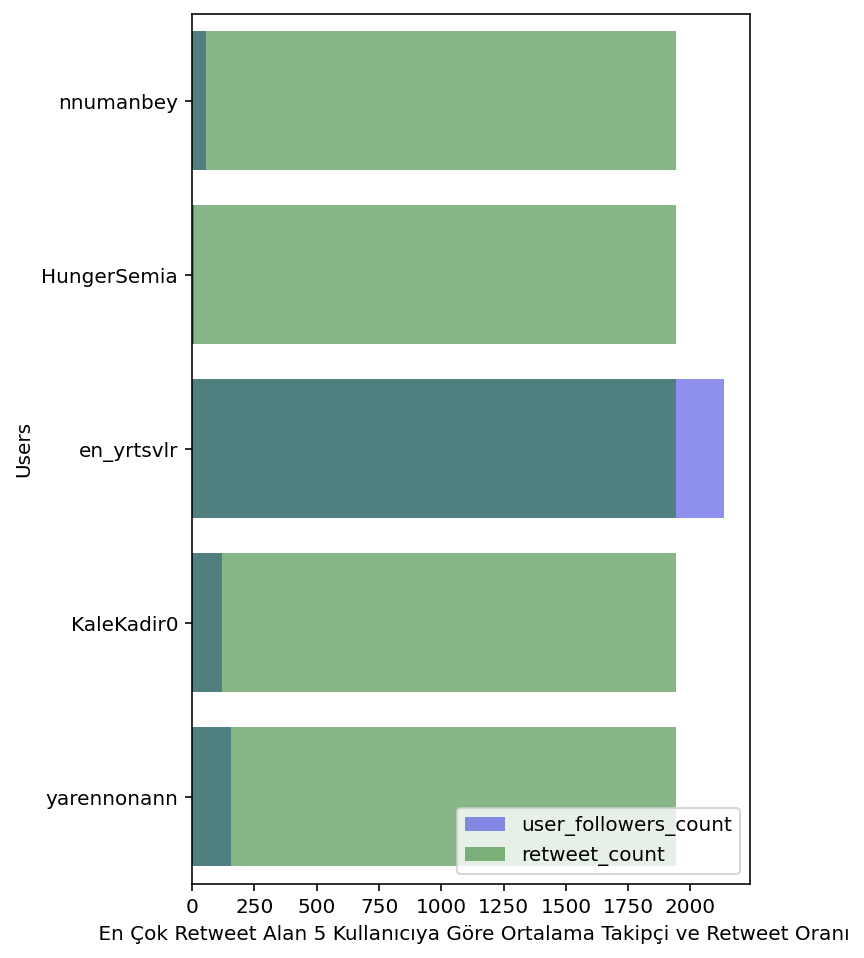

In [126]:
df1=df.sort_values("retweet_count", ascending = False).head()
user_list= list(df1['user_screen_name'].unique())

user_followers_count= []
retweet_count= []

for i in user_list:    
    x = df1[df1['user_screen_name']==i]
    user_followers_count.append(sum(x.user_followers_count)/len(x))
    retweet_count.append(sum(x.retweet_count)/len(x))
    
f,ax = plt.subplots(figsize = (5,8))
sns.barplot(x=user_followers_count,y=user_list,color='blue',alpha = 0.5,label='user_followers_count' )
sns.barplot(x=retweet_count,y=user_list,color='green',alpha = 0.5,label='retweet_count' )
ax.legend(loc='lower right',frameon = True)   
ax.set(xlabel=' En Çok Retweet Alan 5 Kullanıcıya Göre Ortalama Takipçi ve Retweet Oranı', ylabel='Users')
plt.show()

In [127]:
df["text"].str.startswith("RT").head()

0    False
1     True
2     True
3    False
4     True
Name: text, dtype: bool

In [128]:
# tüm tweet sayısına bölerek özgün katıkı oranı bulunabilir.
df[~df["text"].str.startswith("RT")].count()["id"] / len(df) 

0.26

In [129]:
# özgün olmayan katkının özgün katıkıya oranı
df[~df["text"].str.startswith("RT")].count()["id"] / df[df["text"].str.startswith("RT")].count()["id"]  

0.35135135135135137

In [130]:
# en cok fav-retweet
df.sort_values("retweet_count", ascending = False).head(3) 

,id,text,created_at,retweeted,retweet_count,user_screen_name,user_followers_count,user_location,Hashtags
48,1298517733743702016,RT @MyKaraduman: Lütfen destek olup fahrettin ...,2020-08-26 07:08:47,False,1941,nnumanbey,55,,"[{'text': 'fatmayasesol', 'indices': [90, 103]..."
1,1298562064831713281,RT @MyKaraduman: Lütfen destek olup fahrettin ...,2020-08-26 10:04:57,False,1941,HungerSemia,7,,"[{'text': 'fatmayasesol', 'indices': [90, 103]..."
55,1298514354883768323,RT @MyKaraduman: Lütfen destek olup fahrettin ...,2020-08-26 06:55:22,False,1941,en_yrtsvlr,2133,"Kocaeli, Türkiye","[{'text': 'fatmayasesol', 'indices': [90, 103]..."


## Tweet-Saat Dağılımı

In [124]:
?api.search

In [107]:
tweetler = api.search(q = "#datascience", lang = "en", count = 5000) # result_type="popular"

In [21]:
def hashtag_df(tweetler):
    import pandas as pd
    id_list = [tweet.id for tweet  in tweetler]
    df = pd.DataFrame(id_list, columns = ["id"])
    
    df["text"] = [tweet.text for tweet in tweetler]
    df["created_at"] = [tweet.created_at for tweet in tweetler]
    df["retweeted"] = [tweet.retweeted for tweet in tweetler]
    df["retweet_count"] = [tweet.retweet_count for tweet in tweetler]
    df["source"] = [tweet.source for tweet in tweetler]
    df["user_screen_name"] = [tweet.author.screen_name for tweet in tweetler]
    df["user_followers_count"] = [tweet.author.followers_count for tweet in tweetler]
    df["user_location"] = [tweet.author.location for tweet in tweetler]
    df["Hashtags"] = [tweet.entities.get('hashtags') for tweet in tweetler]
    
    return df

In [127]:
df = hashtag_df(tweetler)
df.shape

(100, 10)

In [128]:
df["tweet_saati"] = df["created_at"].apply(lambda x: x.strftime("%H"))
df.head()

,id,text,created_at,retweeted,retweet_count,source,user_screen_name,user_followers_count,user_location,Hashtags,tweet_saati
0,1297622706599452673,RT @gp_pulipaka: Graph Representation Learning...,2020-08-23 19:52:16,False,68,Twitter for iPad,AlexM38000,56,"Seyssinet-Pariset, France","[{'text': 'BigData', 'indices': [53, 61]}, {'t...",19
1,1297622671165972480,RT @iamjony94: 44 Marketing Tools to Consider ...,2020-08-23 19:52:08,False,7,hubofml,hubofml,5293,Germany,"[{'text': 'socialmedia', 'indices': [79, 91]},...",19
2,1297622646453084162,RT @iamjony94: 44 Marketing Tools to Consider ...,2020-08-23 19:52:02,False,7,Donald Ndoro 2,DonaldNdoro,13533,"London, England","[{'text': 'socialmedia', 'indices': [79, 91]},...",19
3,1297622620809105414,RT @samadahmad30: want to learn coding???\n\ng...,2020-08-23 19:51:56,False,48,Twitter for Android,busuulwa_mark,152,,"[{'text': 'BigData', 'indices': [83, 91]}, {'t...",19
4,1297622619462807553,RT @gp_pulipaka: The Official Definition of De...,2020-08-23 19:51:55,False,43,Twitter for iPad,AlexM38000,56,"Seyssinet-Pariset, France","[{'text': 'BigData', 'indices': [78, 86]}, {'t...",19


In [129]:
df["tweet_saati"] = pd.to_numeric(df["tweet_saati"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    100 non-null    int64         
 1   text                  100 non-null    object        
 2   created_at            100 non-null    datetime64[ns]
 3   retweeted             100 non-null    bool          
 4   retweet_count         100 non-null    int64         
 5   source                100 non-null    object        
 6   user_screen_name      100 non-null    object        
 7   user_followers_count  100 non-null    int64         
 8   user_location         100 non-null    object        
 9   Hashtags              100 non-null    object        
 10  tweet_saati           100 non-null    int64         
dtypes: bool(1), datetime64[ns](1), int64(4), object(5)
memory usage: 8.0+ KB


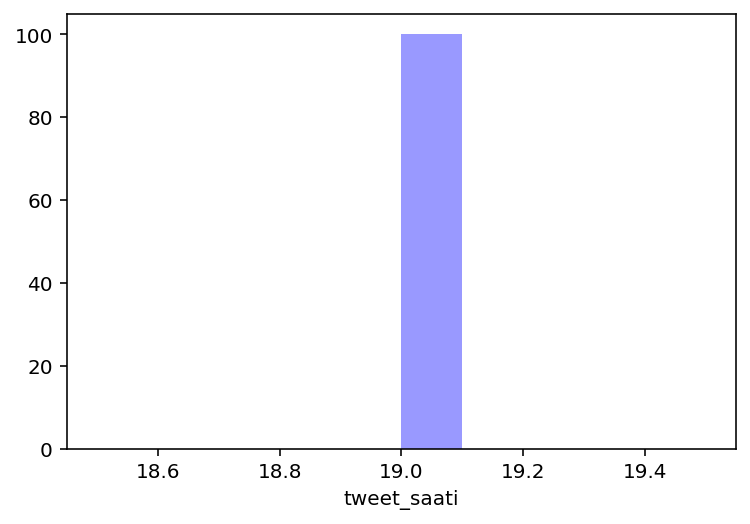

In [130]:
sns.distplot(df["tweet_saati"], kde = False, color ="blue");

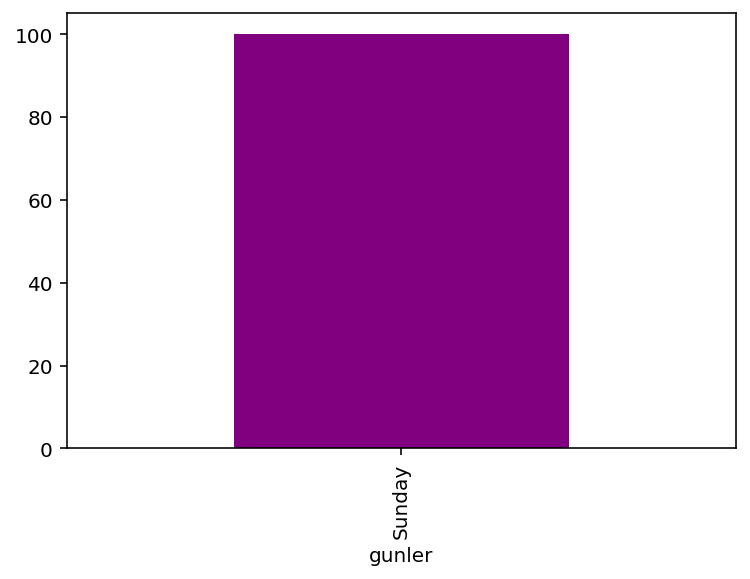

In [133]:
df["gunler"] = df["created_at"].dt.day_name()
gun_freq = df.groupby("gunler").count()["id"]
gun_freq.plot.bar(x = "gunler", y = "id", color="purple")

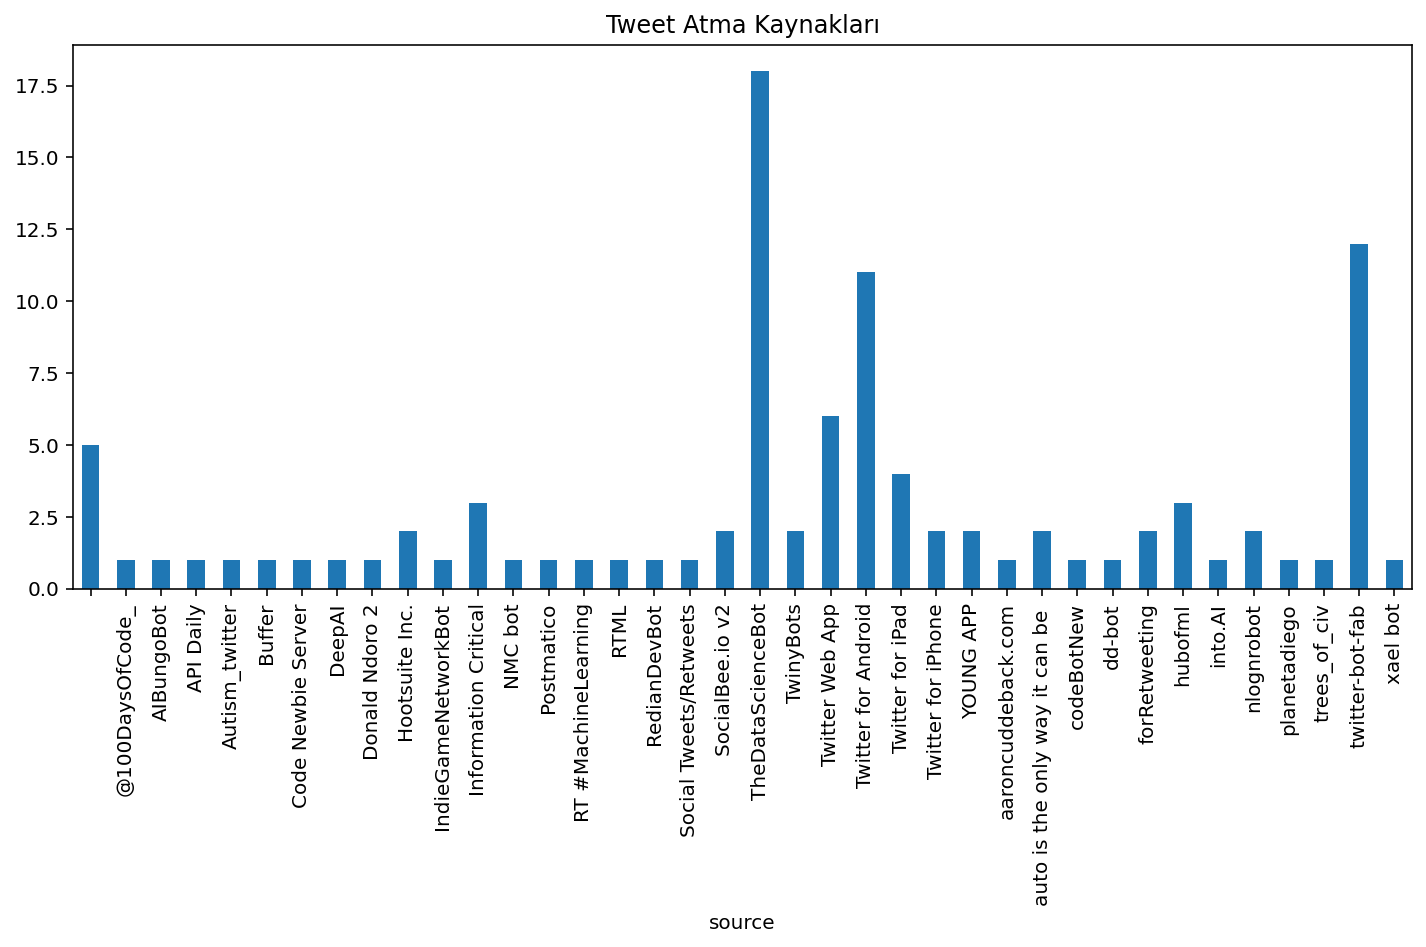

In [136]:
## Tweet Atma Kaynaklarının Betimlenmesi
plt.figure(figsize=(12,5))
plt.title("Tweet Atma Kaynakları")
kaynak_freq = df.groupby("source").count()["id"]
kaynak_freq.plot.bar(x = "source", y = "id")

In [137]:
df.groupby("source").count()["id"].sort_values(ascending=False)

source
TheDataScienceBot                  18
twitter-bot-fab                    12
Twitter for Android                11
Twitter Web App                     6
                                    5
Twitter for iPad                    4
Information Critical                3
hubofml                             3
YOUNG APP                           2
Hootsuite Inc.                      2
TwinyBots                           2
Twitter for iPhone                  2
SocialBee.io v2                     2
forRetweeting                       2
nlognrobot                          2
auto is the only way it can be      2
aaroncuddeback.com                  1
IndieGameNetworkBot                 1
@100DaysOfCode_                     1
AIBungoBot                          1
API Daily                           1
Autism_twitter                      1
Buffer                              1
Code Newbie Server                  1
DeepAI                              1
Donald Ndoro 2                      1
trees

- Bu grafik üzerinden kullanıcıların ipadden attığı tweetlerin favlanma sayısı ortalaması ile iphonedan attığı tweetlerin favlanma sayısı ortalaması arasında istatiksel bi fark var mı? varsa bunu sebebi ne olabilir araştırılabilir. Sosyal skor oluşturup incelemeler yapılabilir. Kullanıcılar önce skorlanır sonra kendi networkleri içerisinde insanları ne kadar etkiliyor?. Hangi alanda etkliyor? gibi araştırmalar yapılabilir.

### Twitter Text Mining

In [111]:
df = hashtag_df(tweetler)

#buyuk-kucuk donusumu
df['text'] = df['text'].apply(lambda x: " ".join(x.lower() for x in x.split()))

#noktalama işaretleri
df['text'] = df['text'].str.replace('[^\w\s]','')

#sayılar
df['text'] = df['text'].str.replace('\d','')

#stopwords
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords
sw = stopwords.words('english')
df['text'] = df['text'].apply(lambda x: " ".join(x for x in x.split() if x not in sw))

#lemmatization
from textblob import Word
#nltk.download('wordnet')
df['text'] = df['text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()])) 

#noktalama işaretleri
df['text'] = df['text'].str.replace('rt','')

In [112]:
df["text"]

0      thienan u bombing vietnamwar million ton bomb...
1      deeplearn future ai httpstcojisohxlczh spiros...
2      deeplearn machinelearning really good httpstc...
3     group expe extensive knowledge expeise applyin...
4      ipfconline data analyst v data scientist what...
                            ...                        
70    way win facebook messenger marketing httpstcoe...
71     bukmedianet computer vision python ocr amp ob...
72     bukmedianet computer vision python ocr amp ob...
73     bukmedianet computer vision python ocr amp ob...
74     zeldia inspiring quote selfimprovement person...
Name: text, Length: 75, dtype: object

In [113]:
freq_df = df["text"].apply(lambda x: pd.value_counts(x.split(" "))).sum(axis =0).reset_index()
freq_df.head()

,index,0
0,ton,5.0
1,thienan,5.0
2,vi,5.0
3,still,5.0
4,bombing,5.0


In [114]:
freq_df.columns=["kelimeler","frekanslar"]
freq_df.head()

,kelimeler,frekanslar
0,ton,5.0
1,thienan,5.0
2,vi,5.0
3,still,5.0
4,bombing,5.0


In [115]:
freq_df.shape

(266, 2)

In [116]:
#datascience ile sık kullanılan kelimelerin frekansları.

In [117]:
a= freq_df[freq_df.frekanslar>freq_df.frekanslar.mean()+freq_df.frekanslar.std()]

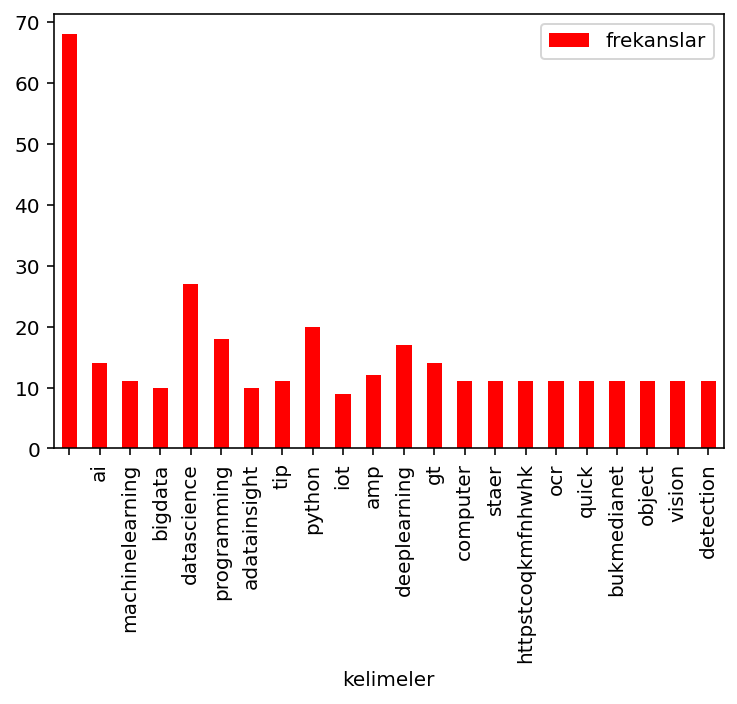

In [118]:
a.plot.bar(x="kelimeler",y="frekanslar", color="red")

In [119]:
#datascience Worldcloud

In [120]:
text = " ".join(i for i in df.text)

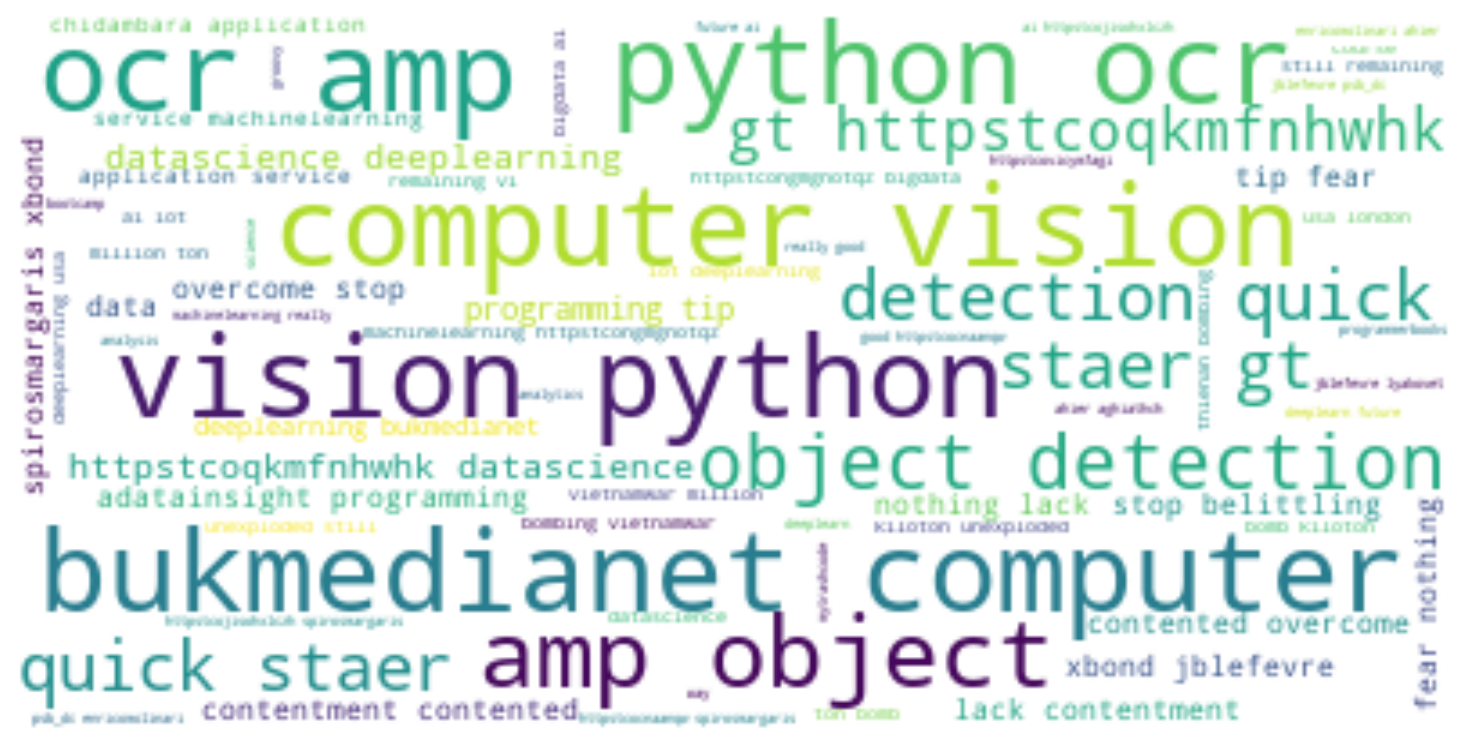

In [121]:
wordcloud = WordCloud(background_color = "white").generate(text)
plt.figure(figsize=(12,5))
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

## Twitter Sentiment Analizi

In [122]:
from textblob import TextBlob

In [123]:
def sentiment_skorla(df):

    text = df["text"]

    for i in range(0,len(text)):
        textB = TextBlob(text[i])
        sentiment_skoru = textB.sentiment.polarity
        df.loc[i, 'sentiment_skoru'] = sentiment_skoru  ### df.at[i, 'sentiment_skoru'] = sentiment_skoru
        
        if sentiment_skoru <0.00:
            duygu_sinifi = 'Negatif'
            df.loc[i, 'duygu_sinifi'] = duygu_sinifi

        elif sentiment_skoru >0.00:
            duygu_sinifi = 'Pozitif'
            df.loc[i, 'duygu_sinifi'] = duygu_sinifi

        else:
            duygu_sinifi = 'Notr'
            df.loc[i, 'duygu_sinifi'] = duygu_sinifi
            
    return df 

In [126]:
sentiment_skorla(df)
df.head(3)

,id,text,created_at,retweeted,retweet_count,user_screen_name,user_followers_count,user_location,Hashtags,sentiment_skoru,duygu_sinifi
0,1298222441114804224,thienan u bombing vietnamwar million ton bomb...,2020-08-25 11:35:24,False,240,EmmaLBriant,12207,Washington DC,"[{'text': 'VietnamWar', 'indices': [38, 49]}]",0.0,Notr
1,1298222428502601729,deeplearn future ai httpstcojisohxlczh spiros...,2020-08-25 11:35:21,False,19,andrewmorrisuk,11542,Bedford,[],0.0,Notr
2,1298222415814758401,deeplearn machinelearning really good httpstc...,2020-08-25 11:35:18,False,18,techai21001,843,"London, England","[{'text': 'MachineLearning', 'indices': [18, 3...",0.7,Pozitif


In [127]:
df.groupby("duygu_sinifi").count()["id"]

duygu_sinifi
Negatif     2
Notr       44
Pozitif    29
Name: id, dtype: int64

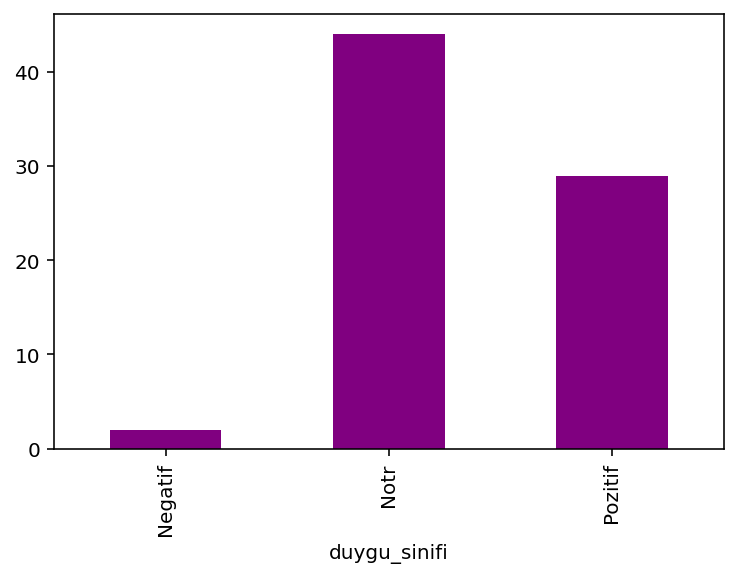

In [128]:
duygu_freq = df.groupby("duygu_sinifi").count()["id"]
duygu_freq.plot.bar(x = "duygu_sinifi",y = "id", color="purple");

### Apple Vs. Samsung Sentiment Analizi

### Samsung

In [89]:
tweetler = api.search(q = "#samsung", lang = "en")

In [90]:
df = hashtag_df(tweetler)

In [91]:
import re
import nltk 
import nltk as nlp

nltk.download("stopwords") 
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Pelin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [92]:
tweetler = [ word for word in df.text if not word in set(stopwords.words("english"))]
lemma = nlp.WordNetLemmatizer()
tweetler = [ lemma.lemmatize(word) for word in tweetler] 

In [93]:
tweet_list = []
for tweetler in df.text:
    tweetler = re.sub("[^a-zA-Z]"," ",tweetler)
    tweetler = tweetler.lower() 
    tweetler = nltk.word_tokenize(tweetler)
    lemma = nlp.WordNetLemmatizer()
    tweetler = [ lemma.lemmatize(word) for word in tweetler]
    tweetler = " ".join(tweetler)
    tweet_list.append(tweetler)

In [94]:
# %% bag of words
from sklearn.feature_extraction.text import CountVectorizer
max_features = 10
count_vectorizer = CountVectorizer(max_features=max_features,stop_words = "english")
sparce_matrix = count_vectorizer.fit_transform(tweet_list).toarray()  
print("en sik kullanilan {} kelimeler: {}".format(max_features,count_vectorizer.get_feature_names()))

en sik kullanilan 10 kelimeler: ['come', 'comment', 'galaxynote', 'mystic', 'new', 'rt', 'samsungindia', 'series', 'stunning', 'tell']


In [95]:
df=pd.DataFrame(tweet_list,columns=['tweets'])

In [96]:
df['sentiment'] = df['tweets'].map(lambda text: TextBlob(text).sentiment.polarity)

In [97]:
df.head()

,tweets,sentiment
0,rt samsungindia the new galaxynote series come...,0.318182
1,rt samsungindia the new galaxynote series come...,0.318182
2,rt samsungindia the new galaxynote series come...,0.318182
3,help u both win a samsung galaxy note ultra fr...,0.587500
4,rt samsungindia the new galaxynote series give...,0.318182


In [98]:
import numpy as np
cut = pd.cut(
    df['sentiment'],
    [-np.inf, -.01, .01, np.inf],
    labels=['negative', 'neutral', 'positive']
)
df['polarity'] = cut.values
df[['polarity','sentiment']].head()

,polarity,sentiment
0,positive,0.318182
1,positive,0.318182
2,positive,0.318182
3,positive,0.587500
4,positive,0.318182


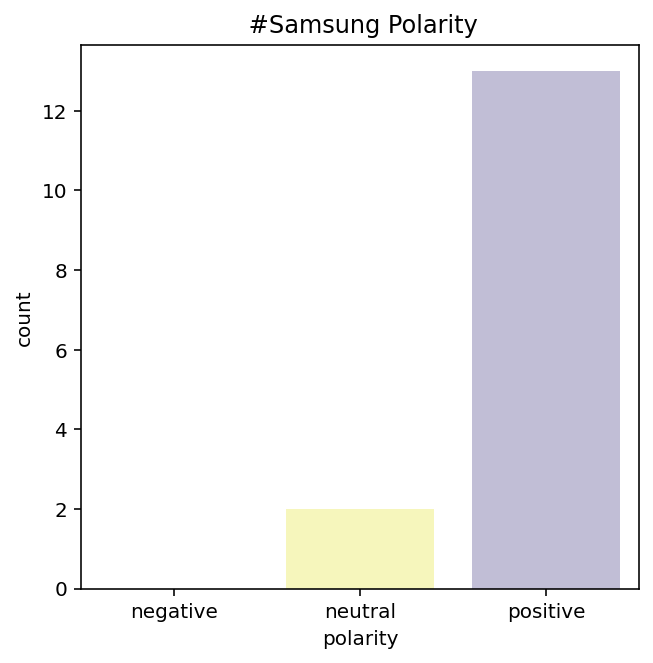

In [99]:
plt.figure(figsize=(5,5))
data= df.polarity
g = sns.countplot(data, palette="Set3")
plt.title(" #Samsung Polarity")
plt.show()

### Apple

In [100]:
tweetler = api.search(q = "#apple", lang = "en")
df = hashtag_df(tweetler)

In [101]:
tweetler = [ word for word in df.text if not word in set(stopwords.words("english"))]
lemma = nlp.WordNetLemmatizer()
tweetler = [ lemma.lemmatize(word) for word in tweetler] 

tweet_list = []
for tweetler in df.text:
    tweetler = re.sub("[^a-zA-Z]"," ",tweetler)
    tweetler = tweetler.lower() 
    tweetler = nltk.word_tokenize(tweetler)
    lemma = nlp.WordNetLemmatizer()
    tweetler = [ lemma.lemmatize(word) for word in tweetler]
    tweetler = " ".join(tweetler)
    tweet_list.append(tweetler)

In [102]:
# %% bag of words
from sklearn.feature_extraction.text import CountVectorizer
max_features = 10
count_vectorizer = CountVectorizer(max_features=max_features,stop_words = "english")
sparce_matrix = count_vectorizer.fit_transform(tweet_list).toarray()  
print("en sik kullanilan {} kelimeler: {}".format(max_features,count_vectorizer.get_feature_names()))

en sik kullanilan 10 kelimeler: ['apple', 'gb', 'http', 'india', 'iphone', 'online', 'price', 'rt', 'se', 'store']


In [103]:
df=pd.DataFrame(tweet_list,columns=['tweets'])
df['sentiment'] = df['tweets'].map(lambda text: TextBlob(text).sentiment.polarity)

cut = pd.cut(
    df['sentiment'],
    [-np.inf, -.01, .01, np.inf],
    labels=['negative', 'neutral', 'positive']
)
df['polarity'] = cut.values
df[['polarity','sentiment']].head()

,polarity,sentiment
0,positive,0.300000
1,positive,0.400000
2,negative,-0.016667
3,positive,0.300000
4,positive,0.023611


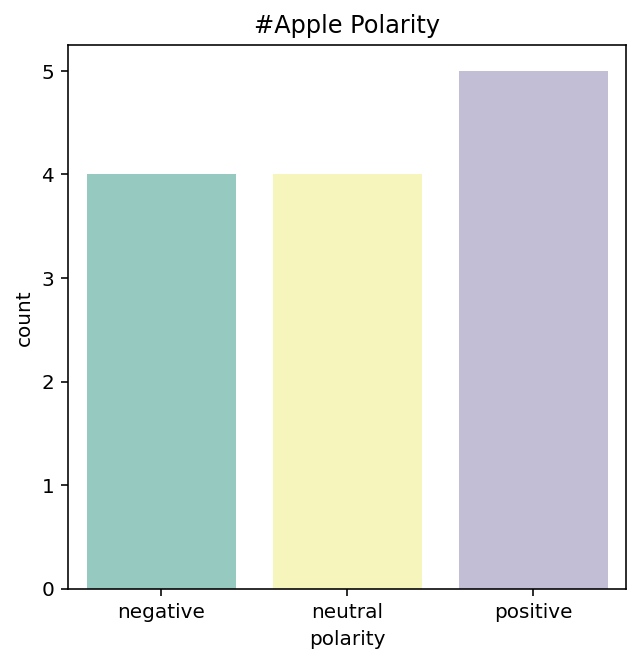

In [104]:
plt.figure(figsize=(5,5))
data= df.polarity
g = sns.countplot(data, palette="Set3")
plt.title("#Apple Polarity")
plt.show()